# Music Development 
### Sunpreet S. Chahal
 

##### Within this notebook, I will be analysing how music has developed over a short amount of time ~100 years.

By looking at music though a collective through specific genres or through annual data collection, I aim to find out how music has developed in short history.

I aim to provide context behind the changes of the music that we listen to, that could be:
- Changes in lifestyles
- Changing hobbies
- Shifting drug consumption 

Data description:
- Genre - Catergory of music
- Year - Release year of music/Collected data of music released on that year
- Acousticness - 
- Danceability - Metric of measuring the ability to dance to music in a specific genre/year
- Duration_ms - How long the average track length is for each genre or year
- energy - Energy of music from a specific genre/year
- Instrumentalness - The relative ratio of the track being instrumental
- Liveness - The relative duration of the track sounding as a live performance
- Loudness - Relative loudness of the track in the typical range [-60, 0] in decibel (dB)
- Speechiness - The relative length of the track containing any kind of human voice
- Tempo - The tempo of the track in Beat Per Minute (BPM)
- Valence - The positiveness of the track
- Popularity - The popularity of the song lately, default country = US}

#### Set-up

In [2]:
## Import libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as mpy
import matplotlib as mtp
import seaborn as sns
import datetime as dt
#sns.set()

In [3]:
## Import data
m_yr_db = pd.read_csv("D:\\PROJECTS\\100 Years of Music ✔\\data_by_year.csv")
m_gn_db = pd.read_csv("D:\\PROJECTS\\100 Years of Music ✔\\data_by_genres.csv")
m_gn_db_new = pd.read_csv("D:\\PROJECTS\\100 Years of Music ✔\\data_by_genres.csv")

In [4]:
m_yr_db.head(3)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1


In [5]:
m_gn_db.head(3)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.2841,352593.2,0.159580,0.484374,0.16858,-22.153400,0.062060,91.351000,0.143380,6.6,4,1
1,432hz,0.485515,0.3120,1047430.4,0.391678,0.477250,0.26594,-18.131267,0.071717,118.900933,0.236483,41.2,11,1
2,8-bit,0.028900,0.6730,133454.0,0.950000,0.630000,0.06900,-7.899000,0.292000,192.816000,0.997000,0.0,5,1


In [6]:
## Extact columns for both datasets
cols_yr = m_yr_db.columns
cols_gn = m_gn_db.columns

In [7]:
cols_yr

Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')

In [8]:
cols_gn

Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')

#### Data Cleaning

In [9]:
## Check for any Null values
m_yr_db.isnull().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [10]:
## Check for any Null values
m_gn_db.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

#### Data Manipulation

In [11]:
## Check for any columns that don't provide any unique/useful data
m_yr_db['mode'].unique().sum()

1

In [12]:
m_gn_db['mode'].unique().sum()

1

In [13]:
## Since this columns provides no useful data and only contains one unique values, I will drop it
# I'm dropping any columns that don't help with my analysis
m_yr_db = m_yr_db.drop(columns=['mode'])
m_gn_db = m_gn_db.drop(columns=['mode'])
m_yr_db = m_yr_db.drop(columns=['key'])
m_gn_db = m_gn_db.drop(columns=['key'])
m_yr_db = m_yr_db.drop(columns=['popularity'])
m_gn_db = m_gn_db.drop(columns=['popularity'])
m_yr_db = m_yr_db.drop(columns=['duration_ms'])
m_gn_db = m_gn_db.drop(columns=['duration_ms'])
m_yr_db

,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1920,0.631242,0.515750,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210
1,1921,0.862105,0.432171,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276
2,1922,0.828934,0.575620,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190
3,1923,0.957247,0.577341,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492
4,1924,0.940200,0.549894,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725
...,...,...,...,...,...,...,...,...,...,...
97,2017,0.207413,0.580475,0.686392,0.247068,0.231513,-8.026319,0.096717,121.829807,0.436313
98,2018,0.233836,0.602731,0.659552,0.229874,0.231009,-8.173434,0.121045,123.644288,0.426566
99,2019,0.261344,0.603101,0.629781,0.221123,0.218501,-8.527674,0.106820,122.419702,0.457813
100,2020,0.202303,0.605285,0.674247,0.249008,0.234415,-8.077563,0.100629,124.058308,0.468030


#### Data Exploraton

In [14]:
cols_gn

Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')

In [15]:
## Decadal data is not available.
# I need this data for my analysis, to do this I need to calculate the mean for each factor.
d_1920s = m_yr_db.loc[0:9] 
d_1930s = m_yr_db.loc[10:19] 
d_1940s = m_yr_db.loc[20:29] 
d_1950s = m_yr_db.loc[30:39] 
d_1960s = m_yr_db.loc[40:49] 
d_1970s = m_yr_db.loc[50:59] 
d_1980s = m_yr_db.loc[60:69] 
d_1990s = m_yr_db.loc[70:79] 
d_2000s = m_yr_db.loc[80:89] 
d_2010s = m_yr_db.loc[90:99] 
d_2020s = m_yr_db.loc[100:101] 
d_1920s

,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1920,0.631242,0.515750,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210
1,1921,0.862105,0.432171,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276
2,1922,0.828934,0.575620,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190
3,1923,0.957247,0.577341,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492
4,1924,0.940200,0.549894,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725
5,1925,0.962702,0.574875,0.278086,0.420196,0.237207,-14.165355,0.111668,115.479832,0.621187
6,1926,0.666387,0.596915,0.210506,0.336093,0.232021,-18.487423,0.477919,109.570972,0.437094
7,1927,0.915826,0.655929,0.267902,0.320992,0.177387,-15.235276,0.261915,112.663707,0.669676
8,1928,0.939141,0.534907,0.208856,0.490955,0.174657,-17.131424,0.158645,106.749062,0.497412
9,1929,0.601015,0.647840,0.241908,0.215405,0.235977,-16.533056,0.490464,110.926711,0.636805


In [16]:
y_acou_d = (d_1920s['acousticness'].sum()/9,d_1930s['acousticness'].sum()/9,d_1940s['acousticness'].sum()/9,d_1950s['acousticness'].sum()/9,
          d_1960s['acousticness'].sum()/9,d_1970s['acousticness'].sum()/9,d_1980s['acousticness'].sum()/9,d_1990s['acousticness'].sum()/9,
          d_2000s['acousticness'].sum()/9,d_2010s['acousticness'].sum()/9, d_2020s['acousticness'].sum()/2)

y_dance_d = (d_1920s['danceability'].sum()/9,d_1930s['danceability'].sum()/9,d_1940s['danceability'].sum()/9,d_1950s['danceability'].sum()/9,
          d_1960s['danceability'].sum()/9,d_1970s['danceability'].sum()/9,d_1980s['danceability'].sum()/9,d_1990s['danceability'].sum()/9,
          d_2000s['danceability'].sum()/9,d_2010s['danceability'].sum()/9, d_2020s['danceability'].sum()/2)

y_energy_d = (d_1920s['energy'].sum()/9,d_1930s['energy'].sum()/9,d_1940s['energy'].sum()/9,d_1950s['energy'].sum()/9,
          d_1960s['energy'].sum()/9,d_1970s['energy'].sum()/9,d_1980s['energy'].sum()/9,d_1990s['energy'].sum()/9,
          d_2000s['energy'].sum()/9,d_2010s['energy'].sum()/9, d_2020s['energy'].sum()/2)


y_instrumental_d = (d_1920s['instrumentalness'].sum()/9,d_1930s['instrumentalness'].sum()/9,d_1940s['instrumentalness'].sum()/9,d_1950s['instrumentalness'].sum()/9,
          d_1960s['instrumentalness'].sum()/9,d_1970s['instrumentalness'].sum()/9,d_1980s['instrumentalness'].sum()/9,d_1990s['instrumentalness'].sum()/9,
          d_2000s['instrumentalness'].sum()/9,d_2010s['instrumentalness'].sum()/9,d_2020s['instrumentalness'].sum()/2)


y_live_d = (d_1920s['liveness'].sum()/9,d_1930s['liveness'].sum()/9,d_1940s['liveness'].sum()/9,d_1950s['liveness'].sum()/9,
          d_1960s['liveness'].sum()/9,d_1970s['liveness'].sum()/9,d_1980s['liveness'].sum()/9,d_1990s['liveness'].sum()/9,
          d_2000s['liveness'].sum()/9,d_2010s['liveness'].sum()/9, d_2020s['liveness'].sum()/2)


y_loud_d = (d_1920s['loudness'].sum()/9,d_1930s['loudness'].sum()/9,d_1940s['loudness'].sum()/9,d_1950s['loudness'].sum()/9,
          d_1960s['loudness'].sum()/9,d_1970s['loudness'].sum()/9,d_1980s['loudness'].sum()/9,d_1990s['loudness'].sum()/9,
          d_2000s['loudness'].sum()/9,d_2010s['loudness'].sum()/9, d_2020s['loudness'].sum()/2)


y_speech_d = (d_1920s['speechiness'].sum()/9,d_1930s['speechiness'].sum()/9,d_1940s['speechiness'].sum()/9,d_1950s['speechiness'].sum()/9,
          d_1960s['speechiness'].sum()/9,d_1970s['speechiness'].sum()/9,d_1980s['speechiness'].sum()/9,d_1990s['speechiness'].sum()/9,
          d_2000s['speechiness'].sum()/9,d_2010s['speechiness'].sum()/9, d_2020s['speechiness'].sum()/2)
 

y_tempo_d = (d_1920s['tempo'].sum()/9,d_1930s['tempo'].sum()/9,d_1940s['tempo'].sum()/9,d_1950s['tempo'].sum()/9,
          d_1960s['tempo'].sum()/9,d_1970s['tempo'].sum()/9,d_1980s['tempo'].sum()/9,d_1990s['tempo'].sum()/9,
          d_2000s['tempo'].sum()/9,d_2010s['tempo'].sum()/9, d_2020s['tempo'].sum()/2)


y_valence_d = (d_1920s['valence'].sum()/9,d_1930s['valence'].sum()/9,d_1940s['valence'].sum()/9,d_1950s['valence'].sum()/9,
          d_1960s['valence'].sum()/9,d_1970s['valence'].sum()/9,d_1980s['valence'].sum()/9,d_1990s['valence'].sum()/9,
          d_2000s['valence'].sum()/9,d_2010s['valence'].sum()/9, d_2020s['valence'].sum()/2)

y_instrumental_d

(0.4092474736048322,
 0.27962262495734214,
 0.42155609325559296,
 0.27156206604611116,
 0.1817432438137293,
 0.13024056323454486,
 0.13859151891201288,
 0.1317072561275822,
 0.14045938795461727,
 0.25496806213173945,
 0.3028867762095986)

#### Data Visualisation

In [17]:
cols_yr

Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')

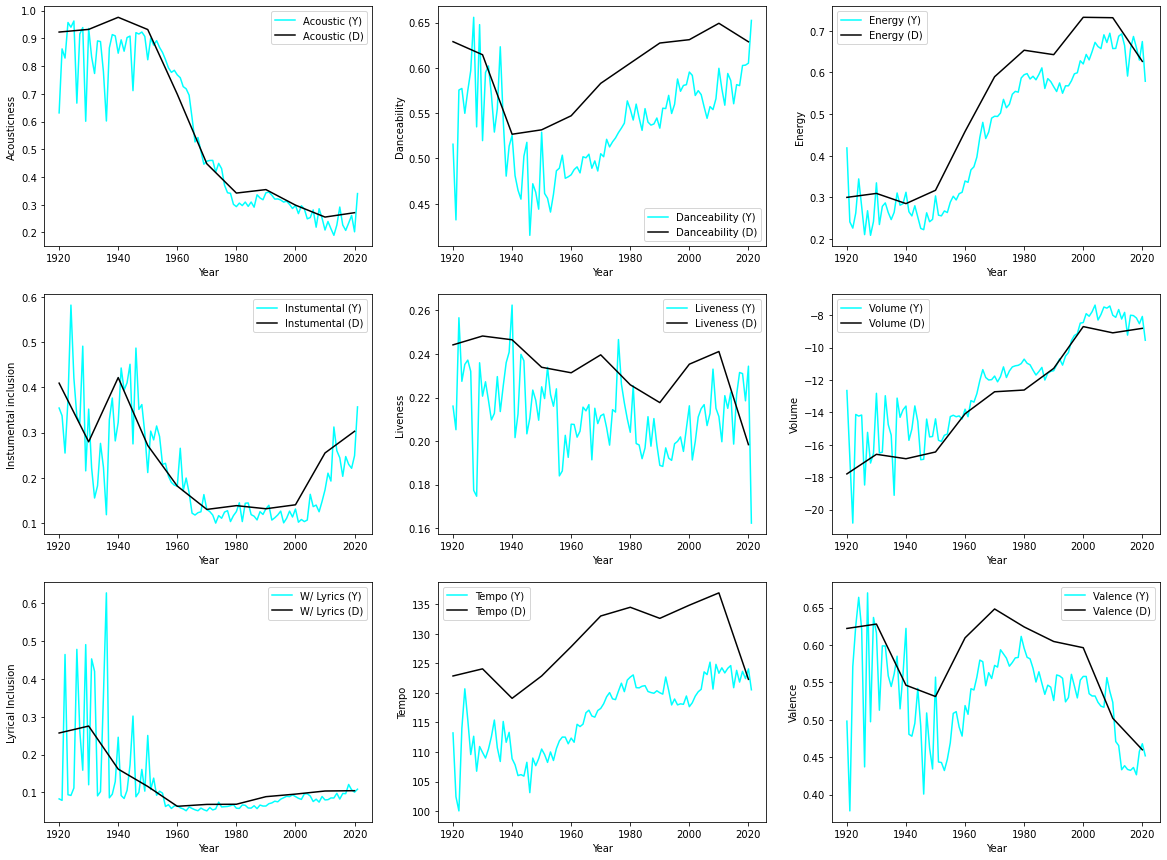

In [23]:
## Visualise annual musical data in line graphs
line_yr_x = m_yr_db['year']
line_d_x = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
line_yr_y_acousticness = m_yr_db['acousticness']
line_yr_y_danceability = m_yr_db['danceability']
line_yr_y_energy = m_yr_db['energy']
line_yr_y_instrumentalness = m_yr_db['instrumentalness']
line_yr_y_liveness = m_yr_db['liveness']
line_yr_y_loudness = m_yr_db['loudness']
line_yr_y_speechiness = m_yr_db['speechiness']
line_yr_y_tempo = m_yr_db['tempo']
line_yr_y_valence = m_yr_db['valence']

mpy.figure(figsize=(20,15))

# Plot data - various subplots for accurate data distribution - (Y) = Year/annual / (D) = Decadal/Decade increments 
#Acoustic data
mpy.subplot(331)
mpy.plot(line_yr_x, line_yr_y_acousticness, label= 'Acoustic (Y)', color= 'cyan')
mpy.plot(line_d_x, y_acou_d, label= 'Acoustic (D)', color= 'black')
mpy.xlabel('Year')
mpy.ylabel('Acousticness')
mpy.legend()

#Danceability data
mpy.subplot(332)
mpy.plot(line_yr_x, line_yr_y_danceability, label= 'Danceability (Y)', color= 'cyan')
mpy.plot(line_d_x, y_dance_d, label= 'Danceability (D)', color= 'black')
mpy.xlabel('Year')
mpy.ylabel('Danceability')
mpy.legend()

#Energy data
mpy.subplot(333)
mpy.plot(line_yr_x, line_yr_y_energy, label= 'Energy (Y)', color= 'cyan')
mpy.plot(line_d_x, y_energy_d, label= 'Energy (D)', color= 'black')
mpy.xlabel('Year')
mpy.ylabel('Energy')
mpy.legend()

#Instumental inclusion data
mpy.subplot(334)
mpy.plot(line_yr_x, line_yr_y_instrumentalness, label= 'Instumental (Y)', color= 'cyan')
mpy.plot(line_d_x, y_instrumental_d, label= 'Instumental (D)', color= 'black')
mpy.xlabel('Year')
mpy.ylabel('Instumental inclusion')
mpy.legend()

#Liveness data
mpy.subplot(335)
mpy.plot(line_yr_x, line_yr_y_liveness, label= 'Liveness (Y)', color= 'cyan')
mpy.plot(line_d_x, y_live_d, label= 'Liveness (D)', color= 'black')
mpy.xlabel('Year')
mpy.ylabel('Liveness')
mpy.legend()

#Loudness data
mpy.subplot(336)
mpy.plot(line_yr_x, line_yr_y_loudness, label= 'Volume (Y)', color= 'cyan')
mpy.plot(line_d_x, y_loud_d, label= 'Volume (D)', color= 'black')
mpy.xlabel('Year')
mpy.ylabel('Volume')
mpy.legend()

#Lyrical inclusion data
mpy.subplot(337)
mpy.plot(line_yr_x, line_yr_y_speechiness, label= 'W/ Lyrics (Y)', color= 'cyan')
mpy.plot(line_d_x, y_speech_d, label= 'W/ Lyrics (D)', color= 'black')
mpy.xlabel('Year')
mpy.ylabel('Lyrical Inclusion')
mpy.legend()

#Tempo data
mpy.subplot(338)
mpy.plot(line_yr_x, line_yr_y_tempo, label= 'Tempo (Y)', color= 'cyan')
mpy.plot(line_d_x, y_tempo_d, label= 'Tempo (D)', color= 'black')
mpy.xlabel('Year')
mpy.ylabel('Tempo')
mpy.legend()

#Valence data
mpy.subplot(339)
mpy.plot(line_yr_x, line_yr_y_valence, label= 'Valence (Y)', color= 'cyan')
mpy.plot(line_d_x, y_valence_d, label= 'Valence (D)', color= 'black')
mpy.xlabel('Year')
mpy.ylabel('Valence')
mpy.legend()


##### The graphs above show how drastically music has changed in the past 100 years alone.

The use of acoustic instruments has dropped significantly since the 1950s. Rock and Roll and Metal alongside the rise of artists such as; Elvis Presley, pioneered the use of electric-based instruments: electric guitars, records and keyboards. This trend continues until the present day, where the majority of the music produced today is based on electric instruments and is synthesized, the use of traditional, acoustic instruments is rising, however, electric instruments and tools are, overall, more efficient to use and generally more versatile. Unless there is an acoustic renaissance, electric instruments will continue to occupy most of the music for the foreseeable future. 

The next category is danceability, this refers to the music that has a melody that can be danced to. There have been a few significant events that have impacted this factor of music. 
- The roaring 20s: After overcoming the first world war and the great depression that had just passed recently, there was a strong need to celebrate and to liven the moods of the people after a time of depression, chaos and death. The 1920s brought along Jazz and Funk music, the upbeat melodies resulting in a happy and optimistic sound shook the hips of the people. Flappers were on the rise, with the sound of Jazz, they danced away the pain brought along by WW1 and the great depression. This trend continued through the decade and leaked into the next; the 1930s followed a similar pattern, continuing the sound of the decade prior.
- World War 2: Another brutal war bringing mass death and rampant depression. The music reflected the events at the time, slow tempo and the general content of the music being war-focused, a far cry from the Jazz of the 20s-30s. Post WW2 America and the world in general needed to celebrate, move past the negativity that the 2nd global war brought. The 1950s were the turning point that shifted music greatly. Bringing the rise of Rock and Roll, the people again began the mass parties, concerts and dance. The graphs visualise this pivotal time, with there being a spike when the 50s began, ever since then, music has been making people tap their feet, shake their hips and dance like never before.   

We can link the ‘Energy’, ‘Volume’ and ‘Tempo’ graph together as they follow a similar pattern. Overall, both the energy and tempo of the music has increased over time. The reason for this could range from a lack of a significant event in recent times, e.g., there was no major world war that changed the world, and in turn, the music – both WW1 and WW2 affected the world and the music we listened to changed. Since there’s no significant factor that has changed our lives, other than the ever-expanding technological innovation and integration of advanced tech into our daily lives, music continues to innovate instead of inventing a new demographic of sound. 

The tempo and energy reflect the development of the world, since the mid-1940s, onwards, the world has become vastly different. Where since, where humanity has innovated, invented and grown at a pace significantly faster than any other time. 